In [197]:
# 📌 1. Gerekli Kütüphaneleri İçe Aktar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")

# 📌 2. Veri Setini Yükle
df = pd.read_csv("C:\\Users\\LENOVO\\Desktop\\Airbnb_Open_Data.csv") 
df.head()


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [198]:
# 📌 3. Veri Setini İncele
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [200]:
df.rename(columns={"room type":"room_type"}, inplace=True)


In [203]:
# 'price' sütunundaki '$' işaretini kaldır
df['price'] = df['price'].str.replace('$', '', regex=False)

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [207]:
# 'price' sütununu sayısal (float) bir türe dönüştür
# Hata durumunda (dönüştürülemeyen değerler olursa) NaN değeri atanır
df['price'] = pd.to_numeric(df['price'], errors='coerce')

df = df[df['price'] < 500]

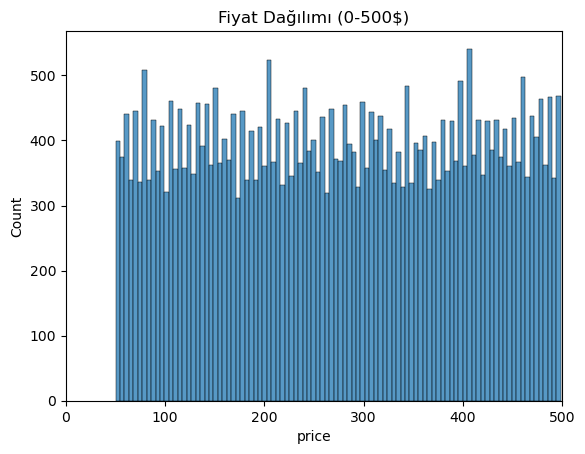

In [209]:
# 📌 4. Keşifsel Veri Analizi (EDA)

# Fiyat dağılımı
sns.histplot(df['price'], bins=100)
plt.xlim(0, 500)
plt.title("Fiyat Dağılımı (0-500$)")
plt.show()

<Axes: xlabel='neighbourhood group', ylabel='price'>

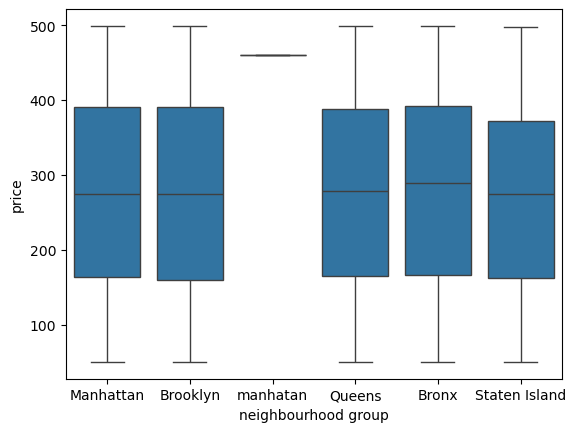

In [211]:
sns.boxplot(data=df, x='neighbourhood group', y='price')

<Axes: xlabel='long', ylabel='lat'>

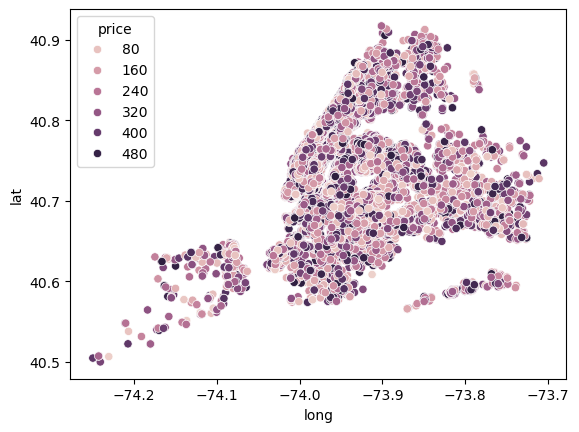

In [213]:
sns.scatterplot(data=df, x='long', y='lat', hue='price')



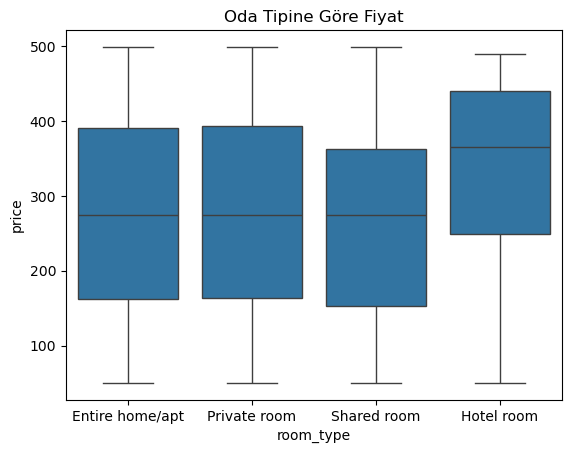

In [214]:
# Oda tipi ve fiyat ilişkisi
sns.boxplot(x="room_type", y="price", data=df[df["price"] < 500])
plt.title("Oda Tipine Göre Fiyat")
plt.show()

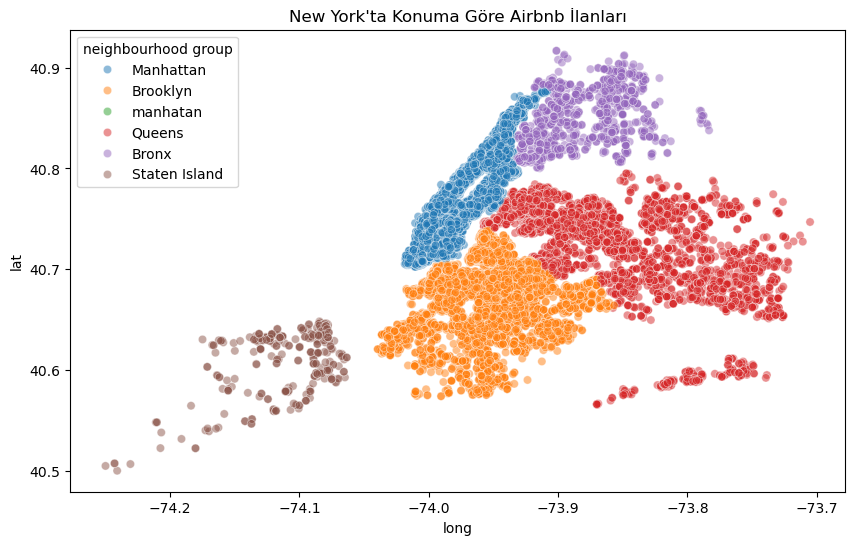

In [217]:
# Konuma göre fiyat 
plt.figure(figsize=(10,6))
sns.scatterplot(data=df[df['price']<500], x="long", y="lat", hue="neighbourhood group", alpha=0.5)
plt.title("New York'ta Konuma Göre Airbnb İlanları")
plt.show()

In [219]:
# 📌 5. Veri Ön İşleme

# Eksik değerleri doldur
df['reviews per month'] = df['reviews per month'].fillna(0)

# Aykırı değerleri filtrele (örnek)
df = df[df['price'] < 500]
df = df[df['minimum nights'] < 30]

# Giriş ve hedef değişkenleri ayır
X = df[['neighbourhood group', 'room_type', 'lat', 'long', 'number of reviews', 'reviews per month']]
y = df['price']

# Kategorik değişkenler
categorical_features = ['neighbourhood group', 'room_type']
numeric_features = ['lat', 'long', 'number of reviews', 'reviews per month', 'availability_365']

# One-hot encoder pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'),categorical_features)
    ],
    remainder='passthrough'  # sayısal değişkenleri olduğu gibi geçir
)


In [221]:
# 📌 6. Modelleme: Random Forest + Grid Search

# Pipeline tanımı
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Hiperparametre arama
param_grid = {
    'model__n_estimators': [50, 100],
    'model__max_depth': [10, 20, None]
}

# Eğitim/test bölmesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

print("En iyi parametreler:", grid_search.best_params_)


En iyi parametreler: {'model__max_depth': None, 'model__n_estimators': 100}


In [222]:
# 📌 7. Model Değerlendirme

y_pred = grid_search.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")


MAE: 73.49
RMSE: 99.51
R2 Score: 0.41


In [244]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Sayısal ve kategorik sütunları ayırın
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Eksik değerler için doldurma stratejileri
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Tüm sütunlar için ön işleme
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


In [248]:
from sklearn.linear_model import LinearRegression

lr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Lineer Regresyon Sonuçları:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2:", r2_score(y_test, y_pred_lr))



Lineer Regresyon Sonuçları:
MAE: 112.5991602715621
RMSE: 129.98203055673935
R2: -0.00023617230487493757


In [284]:
# 📌 8. Sonuç ve Yorumsal Özet
"""1. Mean Absolute Error (MAE)
MAE, tahminlerin gerçek değerlere olan mutlak farklarının ortalamasıdır. Düşük olması istenir.

Random Forest MAE: 73.49

Linear Regression MAE: 112.60

Random Forest, tahminlerinde ortalama olarak daha az hata yapmış. Yani fiyat tahminleri gerçek değerlere daha yakın.


2. Root Mean Squared Error (RMSE)
RMSE, hataların karesinin ortalamasının kareköküdür. Büyük hatalara daha fazla ceza verir. Düşük olması istenir.

Random Forest RMSE: 99.51

Linear Regression RMSE: 129.98

Yine Random Forest, büyük hatalardan daha az etkilenmiş. Lineer regresyona kıyasla daha güvenilir sonuçlar vermiş.

    

3. R^2 Score (Determination Coefficient)
R^2, modelin verideki varyansı ne kadar açıkladığını gösterir. 1'e ne kadar yakınsa o kadar iyi. Negatif bir R^2, modelin çok kötü olduğunu gösterir (ortalama ile tahmin etmek bile daha iyidir demektir).

Random Forest R²: 0.41 → Model, varyansın %41’ini açıklayabiliyor.

Linear Regression R²: -0.0002 → Model, neredeyse hiçbir şeyi açıklayamıyor. Hatta ortalamayla tahmin etmek bile daha iyi sonuç verirdi.

Random Forest burada açıkça çok daha güçlü bir model. Linear Regression, bu veri setine uygun değil veya önemli bazı özellikleri yansıtamıyor olabilir (örneğin lineer olmayan ilişkiler var olabilir).



 Genel Yorum
Veri setin muhtemelen non-lineer ilişkiler barındırıyor, bu nedenle Random Forest gibi non-lineer modeller daha başarılı.

Lineer regresyon, ilişkilerin sadece doğrusal olduğunu varsayar. Bu yüzden karmaşık yapılı Airbnb verisiyle başa çıkmakta zorlanmış.

R²'nin negatif çıkması, modelin tahminlerinin neredeyse rastgele olduğunu gösteriyor.

Random Forest ise en azından makul bir açıklama gücüne sahip."""




"1. Mean Absolute Error (MAE)\nMAE, tahminlerin gerçek değerlere olan mutlak farklarının ortalamasıdır. Düşük olması istenir.\n\nRandom Forest MAE: 73.49\n\nLinear Regression MAE: 112.60\n\nRandom Forest, tahminlerinde ortalama olarak daha az hata yapmış. Yani fiyat tahminleri gerçek değerlere daha yakın.\n\n\n2. Root Mean Squared Error (RMSE)\nRMSE, hataların karesinin ortalamasının kareköküdür. Büyük hatalara daha fazla ceza verir. Düşük olması istenir.\n\nRandom Forest RMSE: 99.51\n\nLinear Regression RMSE: 129.98\n\nYine Random Forest, büyük hatalardan daha az etkilenmiş. Lineer regresyona kıyasla daha güvenilir sonuçlar vermiş.\n\n    \n\n3. R^2 Score (Determination Coefficient)\nR^2, modelin verideki varyansı ne kadar açıkladığını gösterir. 1'e ne kadar yakınsa o kadar iyi. Negatif bir R^2, modelin çok kötü olduğunu gösterir (ortalama ile tahmin etmek bile daha iyidir demektir).\n\nRandom Forest R²: 0.41 → Model, varyansın %41’ini açıklayabiliyor.\n\nLinear Regression R²: -0.0002